In [1]:
import numpy as np

try:
  import cartopy.crs as ccrs
  import cartopy.feature as cfeature
except:
  !apt-get install libproj-dev proj-data proj-bin
  !apt-get install libgeos-dev 
  !pip install cython
  !pip install cartopy
  !pip uninstall shapeley
  !pip install git+https://github.com/Toblerity/Shapely.git
  import cartopy.crs as ccrs
  import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

try:
  from lmatools.grid import fixed
except:
  !pip install git+https://github.com/deeplycloudy/lmatools.git
  from lmatools.grid import fixed


Reading package lists... Done
Building dependency tree       
Reading state information... Done
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  libproj-dev proj-bin
0 upgraded, 2 newly installed, 0 to remove and 31 not upgraded.
Need to get 232 kB of archives.
After this operation, 1,220 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 232 kB in 1s (368 kB/s)
Selecting previously unselected package libproj-dev:amd64.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...
Unpacking libproj-dev:amd64 (4.9.3-2) ...
Selecting previously unselected package proj-bin.
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.

The GLM full-disk (minimum spec) is defined as the intersection of circular and square Earth-centered fields-of-view having minimum diameter 15.59° and minimum length 14.81° respectively. It seems that 16 and 15 deg, respectively, better matches Fig. 4-3 in the GOES data book.

In [0]:
def plot_domain(goesr_grid, title='GOES Domain'):
    # FIXME: use custom globe.
    #         globe = ccrs.Globe(semimajor_axis=proj_var.semi_major_axis, semiminor_axis=proj_var.semi_minor_axis)
    #     proj = ccrs.Geostationary(central_longitude=proj_var.longitude_of_projection_origin,
    #                               satellite_height=proj_var.perspective_point_height, globe=globe)
    nadir = goesr_grid['nadir_lon']

  
    satheight = sat_ecef_height = 35786023.0

    satproj = ccrs.Geostationary(central_longitude=nadir)
    latlon = ccrs.PlateCarree()
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection=satproj)
    ax.set_global()

# Convert below to radians and plot in fixed grid coordinates.
#     rect_span = np.radians(14.81)*satheight #minimum degrees
#     circ_diam = np.radians(15.59)*satheight #minimum degrees
    rect_span = np.radians(15)*satheight #minimum degrees - matches figure in GOES data book
    circ_diam = np.radians(16)*satheight #minimum degrees
    full_disk_rect = mpatches.Rectangle(xy=(-rect_span/2., -rect_span/2.), width=rect_span, height=rect_span, facecolor=(0.8, 0.0, 0.3, .5), transform=satproj)
    full_disk_circ = mpatches.Circle(xy=(0., 0.), radius=circ_diam/2, facecolor=(0.3, 0.0, 1.0, .7), transform=satproj)
    ax.add_patch(full_disk_circ)
    ax.add_patch(full_disk_rect)

    ew, ns = goesr_grid['spanEW']*satheight, goesr_grid['spanNS']*satheight
    cx, cy = goesr_grid['centerEW']*satheight, goesr_grid['centerNS']*satheight
    rect = mpatches.Rectangle(xy=(cx-ew/2., cy-ns/2.), width=ew, height=ns, facecolor=(1.0, 1.0, 1.0, 0.3), transform=satproj)
    ax.add_patch(rect)

    
    state_boundaries = cfeature.NaturalEarthFeature(category='cultural',
                                                    name='admin_1_states_provinces_lakes',
                                                    scale='50m', facecolor='none')
    ax.coastlines('10m', color='k', linewidth=0.25)
    ax.add_feature(state_boundaries, edgecolor='k',linewidth=0.25)
    ax.set_title(title)


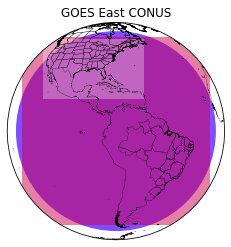

In [11]:
gridspec = fixed.get_GOESR_grid(position='east', view='conus', resolution='2.0km')
plot_domain(gridspec, title='GOES East CONUS')

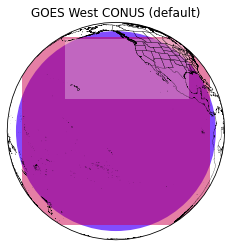

In [12]:
gridspec = fixed.get_GOESR_grid(position='west', view='conus', resolution='2.0km')
plot_domain(gridspec, title='GOES West CONUS (default)')

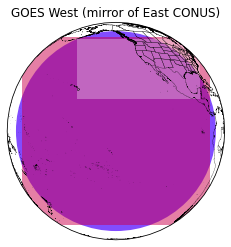

In [13]:
gridspec_paconus = fixed.get_GOESR_grid(position='west', view='conus', resolution='2.0km').copy()
gridspec_econus = fixed.get_GOESR_grid(position='east', view='conus', resolution='2.0km').copy()
gridspec = gridspec_paconus.copy()
gridspec['centerEW'] = -gridspec_econus['centerEW']
plot_domain(gridspec, title='GOES West (mirror of East CONUS)')

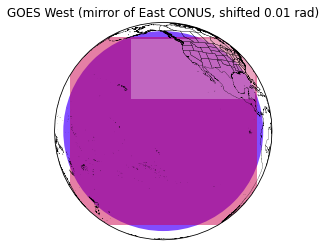

In [14]:
ew_shift_amt = 0.01
gridspec_paconus = fixed.get_GOESR_grid(position='west', view='conus', resolution='2.0km').copy()
gridspec_econus = fixed.get_GOESR_grid(position='east', view='conus', resolution='2.0km').copy()
gridspec = gridspec_paconus.copy()
gridspec['centerEW'] = -gridspec_econus['centerEW'] + ew_shift_amt
plot_domain(gridspec, title='GOES West (mirror of East CONUS, shifted {0} rad)'.format(ew_shift_amt))